In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_22336\499694536.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

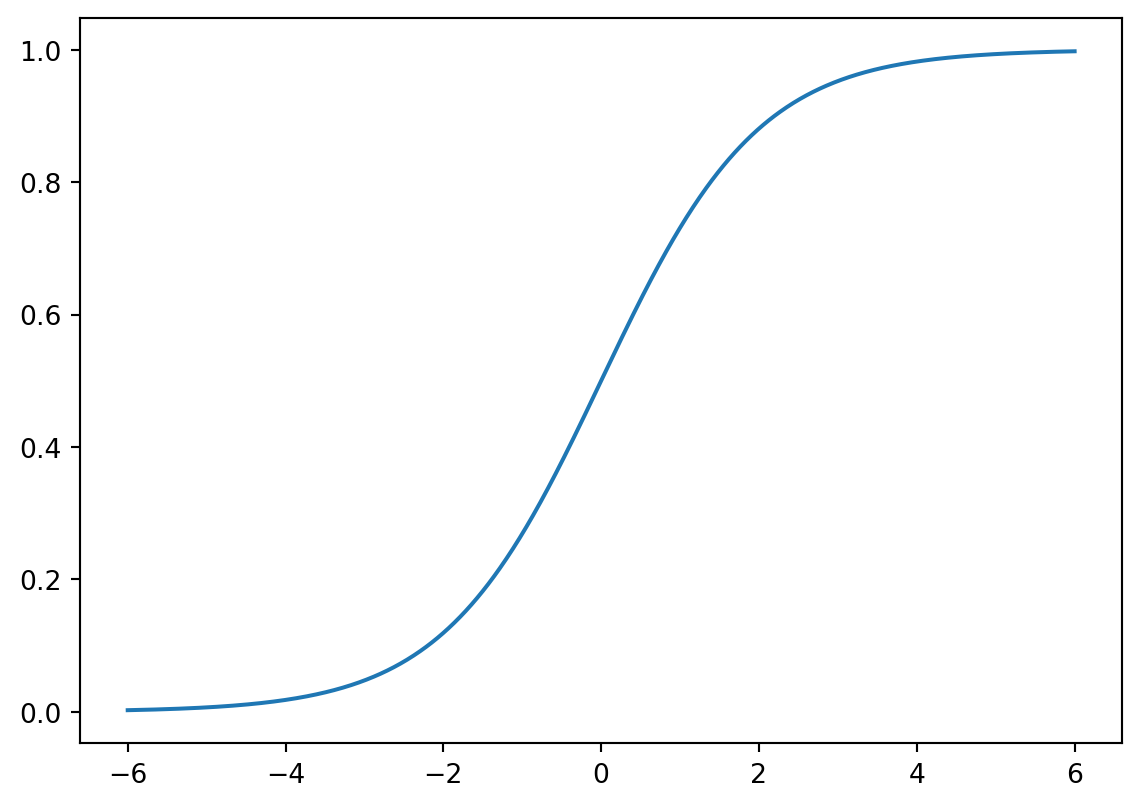

In [2]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1001)
y = 1/(1+np.exp(-x))
_ = plt.plot(x, y)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', LogisticRegression())]

log_reg = Pipeline(steps=steps)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9565217391304348

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', SGDClassifier(loss='log_loss', max_iter=100))]

sgd_clf = Pipeline(steps=steps)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.9565217391304348

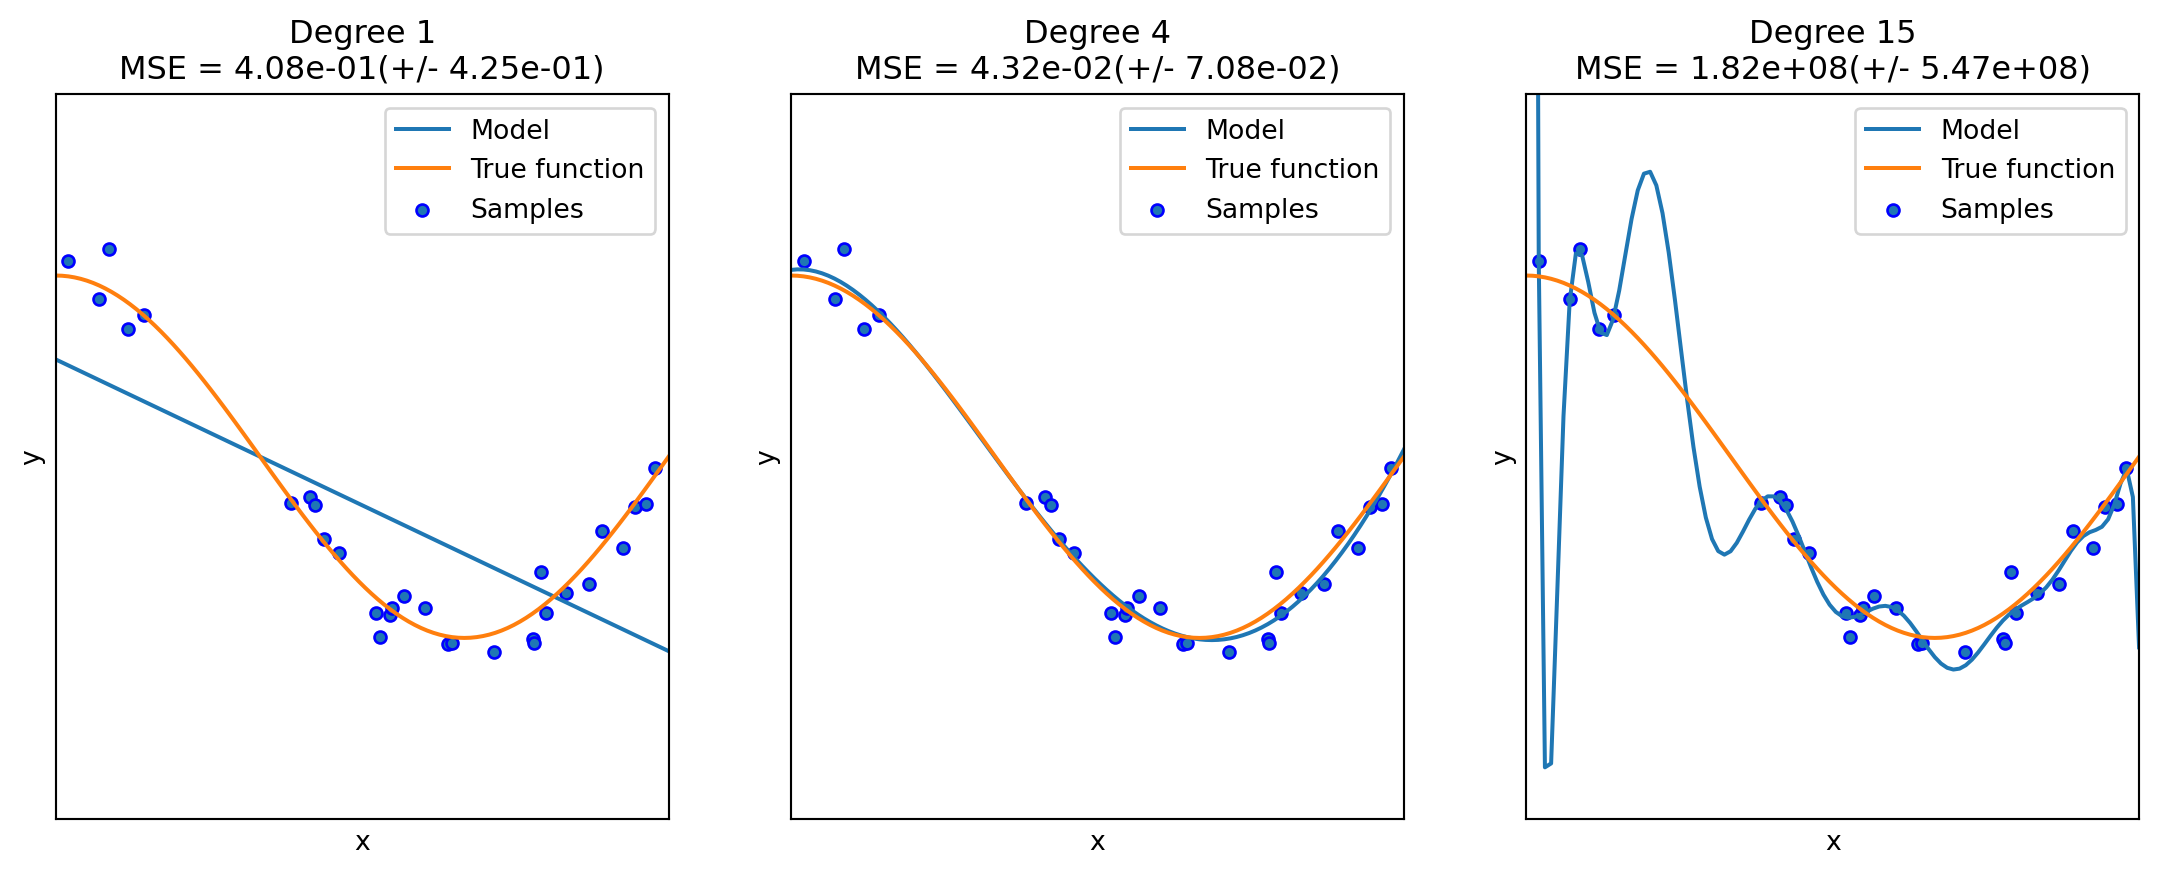

In [6]:
#| echo: false
#| column: page
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
# plt.show()

In [7]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

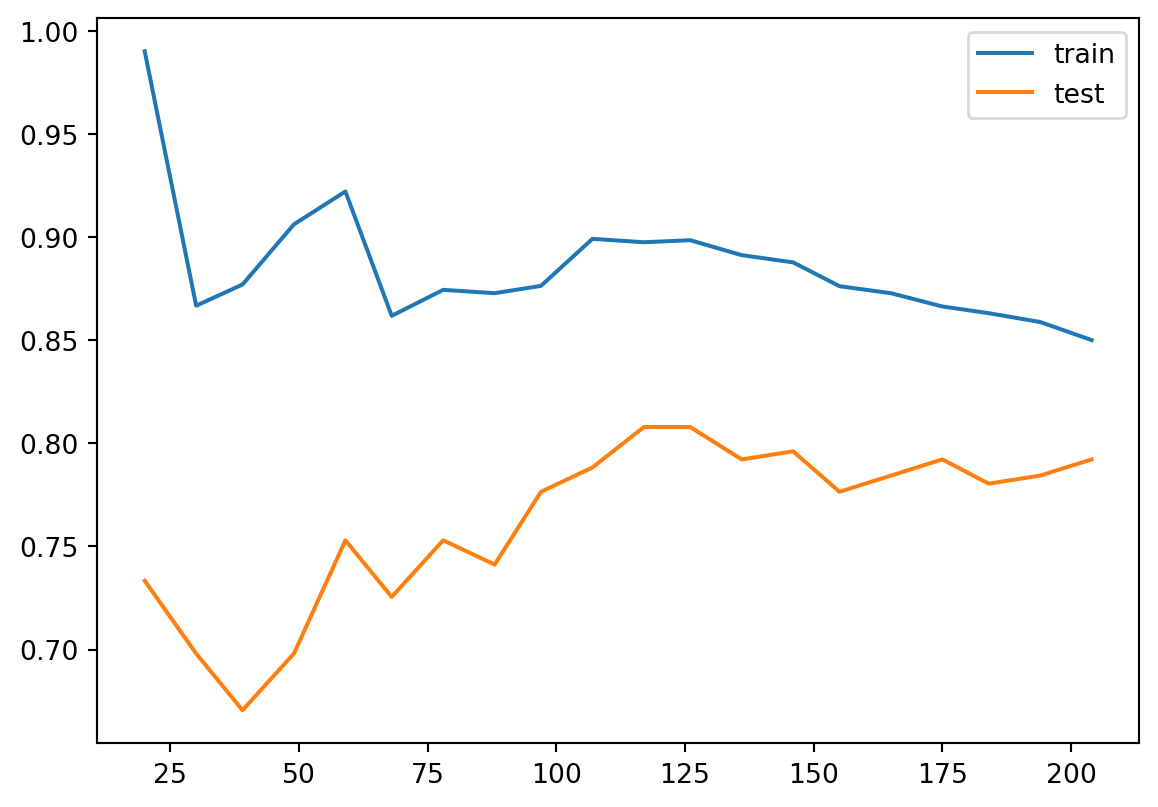

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegression(max_iter=1000)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

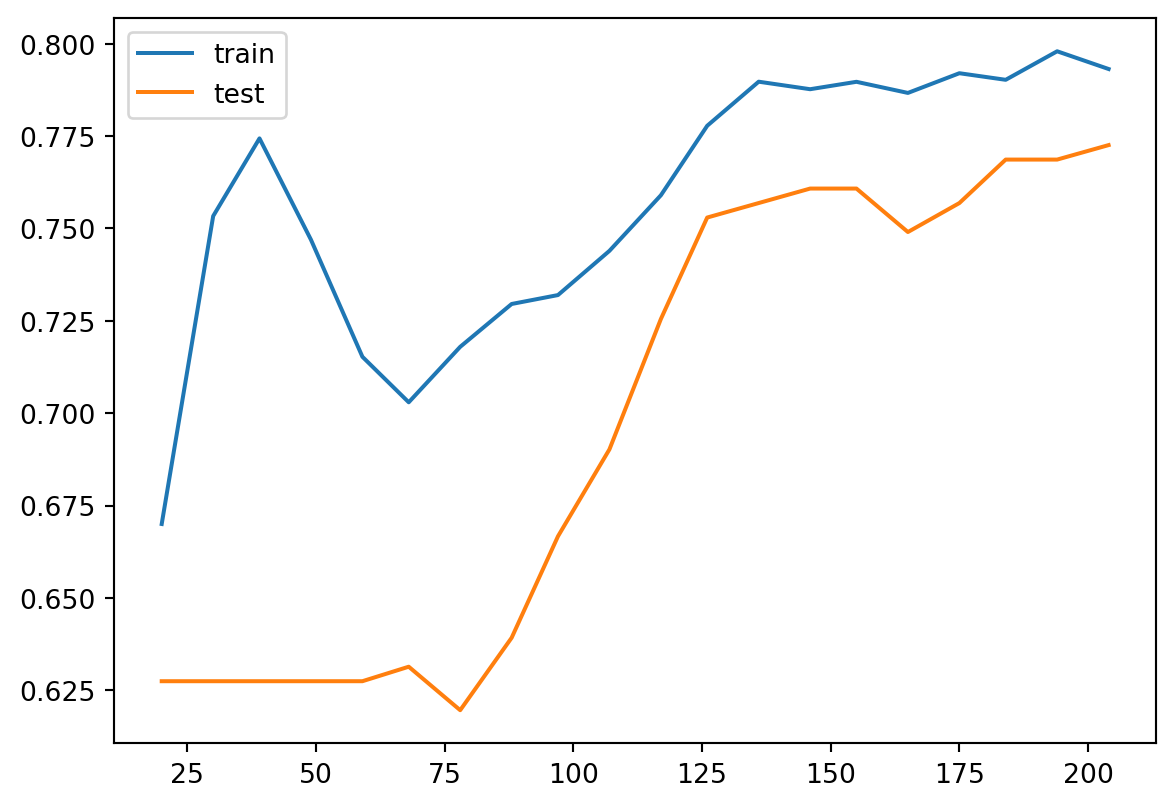

In [9]:
clf = LogisticRegression(max_iter=1000, C=0.1)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

In [10]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [12]:
#| output: false
import keras_core as keras
from keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))

Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 0.9072 - accuracy: 0.3333

9/9 [==============================] - 0s 18ms/step - loss: 0.8883 - accuracy: 0.3490 - val_loss: 0.8741 - val_accuracy: 0.3556


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9682 - accuracy: 0.2667

9/9 [==============================] - 0s 4ms/step - loss: 0.8643 - accuracy: 0.3373 - val_loss: 0.8454 - val_accuracy: 0.3556


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8742 - accuracy: 0.3000

9/9 [==============================] - 0s 4ms/step - loss: 0.8421 - accuracy: 0.3333 - val_loss: 0.8196 - val_accuracy: 0.3778


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8003 - accuracy: 0.3000

9/9 [==============================] - 0s 5ms/step - loss: 0.8228 - accuracy: 0.3294 - val_loss: 0.7951 - val_accuracy: 0.4222


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8549 - accuracy: 0.3667

9/9 [==============================] - 0s 5ms/step - loss: 0.8039 - accuracy: 0.3333 - val_loss: 0.7741 - val_accuracy: 0.4444


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8060 - accuracy: 0.3333

9/9 [==============================] - 0s 4ms/step - loss: 0.7896 - accuracy: 0.3647 - val_loss: 0.7539 - val_accuracy: 0.4667


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7856 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.7753 - accuracy: 0.3804 - val_loss: 0.7367 - val_accuracy: 0.5111


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8015 - accuracy: 0.3000

9/9 [==============================] - 0s 4ms/step - loss: 0.7624 - accuracy: 0.3882 - val_loss: 0.7230 - val_accuracy: 0.5333


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7422 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.7524 - accuracy: 0.4314 - val_loss: 0.7096 - val_accuracy: 0.5111


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7508 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.7432 - accuracy: 0.4627 - val_loss: 0.6970 - val_accuracy: 0.4889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7048 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.7350 - accuracy: 0.4549 - val_loss: 0.6862 - val_accuracy: 0.4889


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7094 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.7281 - accuracy: 0.4745 - val_loss: 0.6769 - val_accuracy: 0.5111


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7123 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.7219 - accuracy: 0.4784 - val_loss: 0.6693 - val_accuracy: 0.5333


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7967 - accuracy: 0.3333

9/9 [==============================] - 0s 5ms/step - loss: 0.7164 - accuracy: 0.4980 - val_loss: 0.6625 - val_accuracy: 0.5556


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.5176 - val_loss: 0.6555 - val_accuracy: 0.5556


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7830 - accuracy: 0.3667

9/9 [==============================] - 0s 5ms/step - loss: 0.7074 - accuracy: 0.5647 - val_loss: 0.6504 - val_accuracy: 0.5111


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7539 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.7042 - accuracy: 0.5765 - val_loss: 0.6447 - val_accuracy: 0.5333


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7388 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.7002 - accuracy: 0.5765 - val_loss: 0.6405 - val_accuracy: 0.5333


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.5961 - val_loss: 0.6361 - val_accuracy: 0.5333


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7578 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.6039 - val_loss: 0.6324 - val_accuracy: 0.5333


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.6039 - val_loss: 0.6289 - val_accuracy: 0.5556


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.6118 - val_loss: 0.6257 - val_accuracy: 0.5556


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6183 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.6118 - val_loss: 0.6227 - val_accuracy: 0.5556


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7489 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.6078 - val_loss: 0.6206 - val_accuracy: 0.5556


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.6039 - val_loss: 0.6185 - val_accuracy: 0.5556


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7131 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.6039 - val_loss: 0.6158 - val_accuracy: 0.5556


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.6078 - val_loss: 0.6133 - val_accuracy: 0.5778


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6950 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.6196 - val_loss: 0.6109 - val_accuracy: 0.6000


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6866 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.6196 - val_loss: 0.6089 - val_accuracy: 0.6000


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.6196 - val_loss: 0.6070 - val_accuracy: 0.6222


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7980 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6196 - val_loss: 0.6048 - val_accuracy: 0.6000


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8048 - accuracy: 0.4333

9/9 [==============================] - 0s 6ms/step - loss: 0.6678 - accuracy: 0.6235 - val_loss: 0.6032 - val_accuracy: 0.6000


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7464 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6660 - accuracy: 0.6235 - val_loss: 0.6011 - val_accuracy: 0.6000


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6446 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.6235 - val_loss: 0.5992 - val_accuracy: 0.6000


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.6196 - val_loss: 0.5975 - val_accuracy: 0.6000


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6605 - accuracy: 0.6235 - val_loss: 0.5962 - val_accuracy: 0.6000


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8145 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6587 - accuracy: 0.6235 - val_loss: 0.5947 - val_accuracy: 0.6222


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6205 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6235 - val_loss: 0.5933 - val_accuracy: 0.6444


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7712 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6235 - val_loss: 0.5915 - val_accuracy: 0.6444


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6526 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.5902 - val_accuracy: 0.6444


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6768 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6235 - val_loss: 0.5886 - val_accuracy: 0.6444


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7059 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6235 - val_loss: 0.5876 - val_accuracy: 0.6444


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.6275 - val_loss: 0.5863 - val_accuracy: 0.6444


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6578 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6468 - accuracy: 0.6275 - val_loss: 0.5846 - val_accuracy: 0.6444


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.6275 - val_loss: 0.5832 - val_accuracy: 0.6444


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6925 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6435 - accuracy: 0.6275 - val_loss: 0.5819 - val_accuracy: 0.6444


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.6275 - val_loss: 0.5812 - val_accuracy: 0.6444


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.6275 - val_loss: 0.5803 - val_accuracy: 0.6444


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.6275 - val_loss: 0.5785 - val_accuracy: 0.6444


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6314 - val_loss: 0.5775 - val_accuracy: 0.6444


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6356 - accuracy: 0.6314 - val_loss: 0.5769 - val_accuracy: 0.6444


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5885 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6340 - accuracy: 0.6314 - val_loss: 0.5757 - val_accuracy: 0.6667


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6325 - accuracy: 0.6314 - val_loss: 0.5747 - val_accuracy: 0.6667


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7071 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6312 - accuracy: 0.6314 - val_loss: 0.5741 - val_accuracy: 0.6667


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6215 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6296 - accuracy: 0.6314 - val_loss: 0.5731 - val_accuracy: 0.6667


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6281 - accuracy: 0.6314 - val_loss: 0.5722 - val_accuracy: 0.6667


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6374 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6266 - accuracy: 0.6275 - val_loss: 0.5712 - val_accuracy: 0.6667


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6252 - accuracy: 0.6275 - val_loss: 0.5702 - val_accuracy: 0.6667


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.6238 - accuracy: 0.6235 - val_loss: 0.5686 - val_accuracy: 0.6667


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5686 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6224 - accuracy: 0.6275 - val_loss: 0.5675 - val_accuracy: 0.6667


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6196 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6210 - accuracy: 0.6275 - val_loss: 0.5667 - val_accuracy: 0.6667


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5635 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.6195 - accuracy: 0.6314 - val_loss: 0.5657 - val_accuracy: 0.6667


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4879 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.6182 - accuracy: 0.6314 - val_loss: 0.5646 - val_accuracy: 0.6667


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6423 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6168 - accuracy: 0.6314 - val_loss: 0.5637 - val_accuracy: 0.6667


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6154 - accuracy: 0.6314 - val_loss: 0.5628 - val_accuracy: 0.6667


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6141 - accuracy: 0.6314 - val_loss: 0.5619 - val_accuracy: 0.6667


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6383 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6314 - val_loss: 0.5610 - val_accuracy: 0.6667


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6114 - accuracy: 0.6314 - val_loss: 0.5599 - val_accuracy: 0.6667


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.6102 - accuracy: 0.6353 - val_loss: 0.5588 - val_accuracy: 0.6667


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6088 - accuracy: 0.6353 - val_loss: 0.5585 - val_accuracy: 0.6667


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6076 - accuracy: 0.6353 - val_loss: 0.5580 - val_accuracy: 0.6667


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6381 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6062 - accuracy: 0.6392 - val_loss: 0.5571 - val_accuracy: 0.6667


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6050 - accuracy: 0.6431 - val_loss: 0.5564 - val_accuracy: 0.6667


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6189 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6037 - accuracy: 0.6392 - val_loss: 0.5556 - val_accuracy: 0.6667


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.5333

9/9 [==============================] - 0s 10ms/step - loss: 0.6025 - accuracy: 0.6392 - val_loss: 0.5549 - val_accuracy: 0.6667


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6013 - accuracy: 0.6431 - val_loss: 0.5534 - val_accuracy: 0.6667


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.6431 - val_loss: 0.5527 - val_accuracy: 0.6667


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.5987 - accuracy: 0.6431 - val_loss: 0.5520 - val_accuracy: 0.6667


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.5976 - accuracy: 0.6431 - val_loss: 0.5512 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.6431 - val_loss: 0.5505 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.6392 - val_loss: 0.5496 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5844 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6392 - val_loss: 0.5491 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6285 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5928 - accuracy: 0.6392 - val_loss: 0.5487 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5918 - accuracy: 0.6431 - val_loss: 0.5478 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5905 - accuracy: 0.6471 - val_loss: 0.5471 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6962 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.5896 - accuracy: 0.6471 - val_loss: 0.5470 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.5882 - accuracy: 0.6510 - val_loss: 0.5463 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5473 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.6471 - val_loss: 0.5449 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5740 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.6510 - val_loss: 0.5441 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7436 - accuracy: 0.4000

9/9 [==============================] - 0s 6ms/step - loss: 0.5853 - accuracy: 0.6549 - val_loss: 0.5442 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7102 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.5841 - accuracy: 0.6627 - val_loss: 0.5439 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5714 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.6667 - val_loss: 0.5430 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5962 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5818 - accuracy: 0.6706 - val_loss: 0.5423 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5899 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5807 - accuracy: 0.6706 - val_loss: 0.5419 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.6745 - val_loss: 0.5418 - val_accuracy: 0.7111


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.6784 - val_loss: 0.5410 - val_accuracy: 0.7111


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5600 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.6784 - val_loss: 0.5397 - val_accuracy: 0.7111


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5767 - accuracy: 0.6824 - val_loss: 0.5396 - val_accuracy: 0.7111


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6777 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.6863 - val_loss: 0.5391 - val_accuracy: 0.7111


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5586 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5747 - accuracy: 0.6863 - val_loss: 0.5382 - val_accuracy: 0.7111


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.5737 - accuracy: 0.6863 - val_loss: 0.5376 - val_accuracy: 0.7111


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5189 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.5727 - accuracy: 0.6863 - val_loss: 0.5375 - val_accuracy: 0.7111


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.5719 - accuracy: 0.6863 - val_loss: 0.5367 - val_accuracy: 0.7111


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5878 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.5708 - accuracy: 0.6863 - val_loss: 0.5362 - val_accuracy: 0.7333


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.5699 - accuracy: 0.6863 - val_loss: 0.5354 - val_accuracy: 0.7333


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5207 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5690 - accuracy: 0.6902 - val_loss: 0.5347 - val_accuracy: 0.7333


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6411 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.6902 - val_loss: 0.5347 - val_accuracy: 0.7333


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5671 - accuracy: 0.6941 - val_loss: 0.5345 - val_accuracy: 0.7556


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5664 - accuracy: 0.6980 - val_loss: 0.5344 - val_accuracy: 0.7778


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5813 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5653 - accuracy: 0.7020 - val_loss: 0.5338 - val_accuracy: 0.7556


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5645 - accuracy: 0.6980 - val_loss: 0.5328 - val_accuracy: 0.7556


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5083 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5635 - accuracy: 0.6980 - val_loss: 0.5321 - val_accuracy: 0.7556


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5627 - accuracy: 0.6980 - val_loss: 0.5318 - val_accuracy: 0.7778


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5618 - accuracy: 0.7020 - val_loss: 0.5314 - val_accuracy: 0.7778


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5567 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5609 - accuracy: 0.7020 - val_loss: 0.5308 - val_accuracy: 0.7778


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.7020 - val_loss: 0.5302 - val_accuracy: 0.7778


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5592 - accuracy: 0.7059 - val_loss: 0.5297 - val_accuracy: 0.7778


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5687 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.7137 - val_loss: 0.5295 - val_accuracy: 0.7778


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6024 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.7294 - val_loss: 0.5289 - val_accuracy: 0.7778


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.7294 - val_loss: 0.5290 - val_accuracy: 0.7778


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7294 - val_loss: 0.5287 - val_accuracy: 0.7778


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5590 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.7294 - val_loss: 0.5279 - val_accuracy: 0.7778


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5541 - accuracy: 0.7333 - val_loss: 0.5274 - val_accuracy: 0.7778


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5533 - accuracy: 0.7333 - val_loss: 0.5274 - val_accuracy: 0.7778


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4805 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5525 - accuracy: 0.7373 - val_loss: 0.5269 - val_accuracy: 0.7778


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.7373 - val_loss: 0.5269 - val_accuracy: 0.7778


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5509 - accuracy: 0.7412 - val_loss: 0.5263 - val_accuracy: 0.7778


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5737 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5501 - accuracy: 0.7490 - val_loss: 0.5255 - val_accuracy: 0.7778


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5493 - accuracy: 0.7490 - val_loss: 0.5246 - val_accuracy: 0.7778


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5614 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7490 - val_loss: 0.5239 - val_accuracy: 0.7778


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.7490 - val_loss: 0.5234 - val_accuracy: 0.7778


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5737 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5470 - accuracy: 0.7490 - val_loss: 0.5232 - val_accuracy: 0.7778


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5466 - accuracy: 0.7490 - val_loss: 0.5222 - val_accuracy: 0.7778


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5888 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7451 - val_loss: 0.5224 - val_accuracy: 0.7778


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4757 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5448 - accuracy: 0.7451 - val_loss: 0.5221 - val_accuracy: 0.7778


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5337 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5441 - accuracy: 0.7569 - val_loss: 0.5226 - val_accuracy: 0.7778


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5434 - accuracy: 0.7608 - val_loss: 0.5224 - val_accuracy: 0.7778


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5426 - accuracy: 0.7569 - val_loss: 0.5224 - val_accuracy: 0.7778


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5492 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.7608 - val_loss: 0.5220 - val_accuracy: 0.7778


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4096 - accuracy: 0.9333

9/9 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.7608 - val_loss: 0.5215 - val_accuracy: 0.7778


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5263 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5405 - accuracy: 0.7647 - val_loss: 0.5207 - val_accuracy: 0.7778


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5559 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5398 - accuracy: 0.7647 - val_loss: 0.5200 - val_accuracy: 0.7778


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5398 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5391 - accuracy: 0.7647 - val_loss: 0.5196 - val_accuracy: 0.7778


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5480 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5385 - accuracy: 0.7647 - val_loss: 0.5198 - val_accuracy: 0.7778


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5377 - accuracy: 0.7647 - val_loss: 0.5193 - val_accuracy: 0.7778


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5370 - accuracy: 0.7647 - val_loss: 0.5189 - val_accuracy: 0.7778


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5096 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5363 - accuracy: 0.7647 - val_loss: 0.5187 - val_accuracy: 0.7778


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7647 - val_loss: 0.5180 - val_accuracy: 0.7778


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.7647 - val_loss: 0.5180 - val_accuracy: 0.7778


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5299 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.7686 - val_loss: 0.5179 - val_accuracy: 0.7778


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5577 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5337 - accuracy: 0.7686 - val_loss: 0.5175 - val_accuracy: 0.7778


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5609 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5331 - accuracy: 0.7686 - val_loss: 0.5173 - val_accuracy: 0.7778


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5325 - accuracy: 0.7686 - val_loss: 0.5165 - val_accuracy: 0.7778


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5317 - accuracy: 0.7686 - val_loss: 0.5161 - val_accuracy: 0.7778


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5368 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5312 - accuracy: 0.7686 - val_loss: 0.5165 - val_accuracy: 0.8000


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4341 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5305 - accuracy: 0.7647 - val_loss: 0.5160 - val_accuracy: 0.8000


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.7725 - val_loss: 0.5156 - val_accuracy: 0.8000


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5053 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7725 - val_loss: 0.5150 - val_accuracy: 0.8000


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5286 - accuracy: 0.7725 - val_loss: 0.5149 - val_accuracy: 0.8000


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4655 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.5280 - accuracy: 0.7686 - val_loss: 0.5149 - val_accuracy: 0.8000


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6368 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 0.7686 - val_loss: 0.5148 - val_accuracy: 0.8000


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5268 - accuracy: 0.7725 - val_loss: 0.5139 - val_accuracy: 0.8000


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.5262 - accuracy: 0.7725 - val_loss: 0.5135 - val_accuracy: 0.8000


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.7000

9/9 [==============================] - 0s 10ms/step - loss: 0.5256 - accuracy: 0.7725 - val_loss: 0.5134 - val_accuracy: 0.8000


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.8000

9/9 [==============================] - 0s 9ms/step - loss: 0.5252 - accuracy: 0.7725 - val_loss: 0.5124 - val_accuracy: 0.8000


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.5245 - accuracy: 0.7725 - val_loss: 0.5118 - val_accuracy: 0.8000


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.5240 - accuracy: 0.7686 - val_loss: 0.5111 - val_accuracy: 0.8000


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5553 - accuracy: 0.7000

9/9 [==============================] - 0s 9ms/step - loss: 0.5233 - accuracy: 0.7686 - val_loss: 0.5110 - val_accuracy: 0.8000


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5774 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.5227 - accuracy: 0.7765 - val_loss: 0.5106 - val_accuracy: 0.8000


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.5222 - accuracy: 0.7725 - val_loss: 0.5104 - val_accuracy: 0.8000


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.5216 - accuracy: 0.7765 - val_loss: 0.5107 - val_accuracy: 0.8000


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5878 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.5210 - accuracy: 0.7765 - val_loss: 0.5108 - val_accuracy: 0.8000


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5190 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7765 - val_loss: 0.5112 - val_accuracy: 0.8000


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4757 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5198 - accuracy: 0.7765 - val_loss: 0.5111 - val_accuracy: 0.8222


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4780 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.5193 - accuracy: 0.7765 - val_loss: 0.5108 - val_accuracy: 0.8222


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4210 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.5188 - accuracy: 0.7765 - val_loss: 0.5111 - val_accuracy: 0.8222


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.5182 - accuracy: 0.7765 - val_loss: 0.5108 - val_accuracy: 0.8222


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.6667

9/9 [==============================] - 0s 11ms/step - loss: 0.5176 - accuracy: 0.7765 - val_loss: 0.5105 - val_accuracy: 0.8222


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5593 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.5170 - accuracy: 0.7765 - val_loss: 0.5099 - val_accuracy: 0.8222


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3871 - accuracy: 1.0000

9/9 [==============================] - 0s 10ms/step - loss: 0.5166 - accuracy: 0.7804 - val_loss: 0.5095 - val_accuracy: 0.8222


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.5160 - accuracy: 0.7765 - val_loss: 0.5098 - val_accuracy: 0.8222


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.5155 - accuracy: 0.7765 - val_loss: 0.5095 - val_accuracy: 0.8222


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4367 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.5149 - accuracy: 0.7765 - val_loss: 0.5095 - val_accuracy: 0.8222


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5696 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.5146 - accuracy: 0.7765 - val_loss: 0.5100 - val_accuracy: 0.8222


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.5140 - accuracy: 0.7765 - val_loss: 0.5092 - val_accuracy: 0.8222


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.5134 - accuracy: 0.7765 - val_loss: 0.5091 - val_accuracy: 0.8222


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5036 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.5128 - accuracy: 0.7765 - val_loss: 0.5091 - val_accuracy: 0.8222


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.5123 - accuracy: 0.7804 - val_loss: 0.5090 - val_accuracy: 0.8222


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.5119 - accuracy: 0.7804 - val_loss: 0.5090 - val_accuracy: 0.8222


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5174 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.5113 - accuracy: 0.7765 - val_loss: 0.5090 - val_accuracy: 0.8222


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.7333

9/9 [==============================] - 0s 9ms/step - loss: 0.5109 - accuracy: 0.7765 - val_loss: 0.5090 - val_accuracy: 0.8222


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.7765 - val_loss: 0.5087 - val_accuracy: 0.8222


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4017 - accuracy: 0.9333

9/9 [==============================] - 0s 8ms/step - loss: 0.5099 - accuracy: 0.7765 - val_loss: 0.5087 - val_accuracy: 0.8222


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5171 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5096 - accuracy: 0.7765 - val_loss: 0.5078 - val_accuracy: 0.8222


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.9333

9/9 [==============================] - 0s 9ms/step - loss: 0.5088 - accuracy: 0.7765 - val_loss: 0.5083 - val_accuracy: 0.8222


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5014 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.5084 - accuracy: 0.7804 - val_loss: 0.5081 - val_accuracy: 0.8222


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.5079 - accuracy: 0.7765 - val_loss: 0.5082 - val_accuracy: 0.8222


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3705 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.5075 - accuracy: 0.7765 - val_loss: 0.5082 - val_accuracy: 0.8222


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5198 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.5070 - accuracy: 0.7765 - val_loss: 0.5083 - val_accuracy: 0.8222


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.7765 - val_loss: 0.5081 - val_accuracy: 0.8222


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4911 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.7765 - val_loss: 0.5076 - val_accuracy: 0.8222


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.7765 - val_loss: 0.5068 - val_accuracy: 0.8222


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4573 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5051 - accuracy: 0.7765 - val_loss: 0.5069 - val_accuracy: 0.8222


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5048 - accuracy: 0.7765 - val_loss: 0.5061 - val_accuracy: 0.8222


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.7765 - val_loss: 0.5056 - val_accuracy: 0.8222


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4972 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5038 - accuracy: 0.7804 - val_loss: 0.5056 - val_accuracy: 0.8222


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5636 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5033 - accuracy: 0.7804 - val_loss: 0.5052 - val_accuracy: 0.8222


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5134 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.7804 - val_loss: 0.5048 - val_accuracy: 0.8222


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.8333

9/9 [==============================] - 0s 10ms/step - loss: 0.5024 - accuracy: 0.7804 - val_loss: 0.5048 - val_accuracy: 0.8222


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.5021 - accuracy: 0.7843 - val_loss: 0.5043 - val_accuracy: 0.8222


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.5015 - accuracy: 0.7804 - val_loss: 0.5045 - val_accuracy: 0.8222


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.8333

9/9 [==============================] - 0s 11ms/step - loss: 0.5010 - accuracy: 0.7804 - val_loss: 0.5045 - val_accuracy: 0.8222


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8667

9/9 [==============================] - 0s 11ms/step - loss: 0.5006 - accuracy: 0.7804 - val_loss: 0.5043 - val_accuracy: 0.8222


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.5001 - accuracy: 0.7843 - val_loss: 0.5045 - val_accuracy: 0.8222


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4997 - accuracy: 0.7843 - val_loss: 0.5043 - val_accuracy: 0.8222


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4848 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4992 - accuracy: 0.7843 - val_loss: 0.5041 - val_accuracy: 0.8222


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.8000

9/9 [==============================] - 0s 11ms/step - loss: 0.4988 - accuracy: 0.7843 - val_loss: 0.5040 - val_accuracy: 0.8222


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.4984 - accuracy: 0.7843 - val_loss: 0.5046 - val_accuracy: 0.8000


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5256 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4980 - accuracy: 0.7843 - val_loss: 0.5044 - val_accuracy: 0.8000


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4975 - accuracy: 0.7843 - val_loss: 0.5051 - val_accuracy: 0.8000


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4763 - accuracy: 0.9000

9/9 [==============================] - 0s 9ms/step - loss: 0.4970 - accuracy: 0.7843 - val_loss: 0.5050 - val_accuracy: 0.8000


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4698 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4966 - accuracy: 0.7843 - val_loss: 0.5048 - val_accuracy: 0.8000


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4964 - accuracy: 0.7843 - val_loss: 0.5053 - val_accuracy: 0.8000


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4958 - accuracy: 0.7843 - val_loss: 0.5042 - val_accuracy: 0.8000


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7843 - val_loss: 0.5044 - val_accuracy: 0.8000


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.7843 - val_loss: 0.5039 - val_accuracy: 0.8000


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4945 - accuracy: 0.7843 - val_loss: 0.5034 - val_accuracy: 0.8000


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4529 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4940 - accuracy: 0.7843 - val_loss: 0.5030 - val_accuracy: 0.8000


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4936 - accuracy: 0.7843 - val_loss: 0.5032 - val_accuracy: 0.8000


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4933 - accuracy: 0.7843 - val_loss: 0.5031 - val_accuracy: 0.8000


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4659 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4929 - accuracy: 0.7843 - val_loss: 0.5024 - val_accuracy: 0.8000


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.7843 - val_loss: 0.5022 - val_accuracy: 0.8000


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7843 - val_loss: 0.5025 - val_accuracy: 0.8000


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4918 - accuracy: 0.7843 - val_loss: 0.5029 - val_accuracy: 0.8000


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.7843 - val_loss: 0.5019 - val_accuracy: 0.8000


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7843 - val_loss: 0.5026 - val_accuracy: 0.8000


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7843 - val_loss: 0.5021 - val_accuracy: 0.8000


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5167 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4901 - accuracy: 0.7843 - val_loss: 0.5021 - val_accuracy: 0.8000


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5654 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4897 - accuracy: 0.7843 - val_loss: 0.5018 - val_accuracy: 0.8000


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.7843 - val_loss: 0.5016 - val_accuracy: 0.8000


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5048 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.7804 - val_loss: 0.5016 - val_accuracy: 0.8000


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4857 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7804 - val_loss: 0.5016 - val_accuracy: 0.8000


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4882 - accuracy: 0.7804 - val_loss: 0.5016 - val_accuracy: 0.8000


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4878 - accuracy: 0.7804 - val_loss: 0.5014 - val_accuracy: 0.8000


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4875 - accuracy: 0.7804 - val_loss: 0.5008 - val_accuracy: 0.8000


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4871 - accuracy: 0.7804 - val_loss: 0.5007 - val_accuracy: 0.8000


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4867 - accuracy: 0.7804 - val_loss: 0.5008 - val_accuracy: 0.8000


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4043 - accuracy: 0.8667

9/9 [==============================] - 0s 10ms/step - loss: 0.4863 - accuracy: 0.7804 - val_loss: 0.5009 - val_accuracy: 0.8000


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4792 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.4860 - accuracy: 0.7804 - val_loss: 0.5009 - val_accuracy: 0.8000


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4856 - accuracy: 0.7843 - val_loss: 0.5015 - val_accuracy: 0.8000


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4521 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.4853 - accuracy: 0.7843 - val_loss: 0.5019 - val_accuracy: 0.8000


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4850 - accuracy: 0.7843 - val_loss: 0.5019 - val_accuracy: 0.8000


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5916 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.4846 - accuracy: 0.7882 - val_loss: 0.5024 - val_accuracy: 0.8000


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4526 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4842 - accuracy: 0.7882 - val_loss: 0.5019 - val_accuracy: 0.8000


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.4839 - accuracy: 0.7882 - val_loss: 0.5013 - val_accuracy: 0.8000


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4835 - accuracy: 0.7882 - val_loss: 0.5014 - val_accuracy: 0.8000


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4832 - accuracy: 0.7882 - val_loss: 0.5013 - val_accuracy: 0.8000


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4614 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.4829 - accuracy: 0.7882 - val_loss: 0.5008 - val_accuracy: 0.8000


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5196 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.4824 - accuracy: 0.7882 - val_loss: 0.5012 - val_accuracy: 0.8000


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4532 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.7882 - val_loss: 0.5013 - val_accuracy: 0.8000


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5080 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.7882 - val_loss: 0.5012 - val_accuracy: 0.8000


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5050 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4814 - accuracy: 0.7882 - val_loss: 0.5010 - val_accuracy: 0.8000


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.4811 - accuracy: 0.7882 - val_loss: 0.5007 - val_accuracy: 0.8000


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4808 - accuracy: 0.7882 - val_loss: 0.5006 - val_accuracy: 0.8000


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.7843 - val_loss: 0.5007 - val_accuracy: 0.8000


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.7843 - val_loss: 0.5009 - val_accuracy: 0.8000


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7843 - val_loss: 0.5004 - val_accuracy: 0.8000


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4773 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.7843 - val_loss: 0.4997 - val_accuracy: 0.8000


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7882 - val_loss: 0.4998 - val_accuracy: 0.8000


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4879 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4786 - accuracy: 0.7882 - val_loss: 0.4997 - val_accuracy: 0.8000


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5057 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7882 - val_loss: 0.5000 - val_accuracy: 0.8000


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6103 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7843 - val_loss: 0.4999 - val_accuracy: 0.8000


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.7843 - val_loss: 0.4995 - val_accuracy: 0.8000


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4214 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.7882 - val_loss: 0.4993 - val_accuracy: 0.8000


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7843 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.9667

9/9 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7882 - val_loss: 0.4989 - val_accuracy: 0.8000


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7922 - val_loss: 0.4989 - val_accuracy: 0.8000


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.7922 - val_loss: 0.4986 - val_accuracy: 0.8000


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5001 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4757 - accuracy: 0.7922 - val_loss: 0.4981 - val_accuracy: 0.8000


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4754 - accuracy: 0.7922 - val_loss: 0.4981 - val_accuracy: 0.8000


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5365 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7882 - val_loss: 0.4992 - val_accuracy: 0.8000


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4747 - accuracy: 0.7882 - val_loss: 0.4993 - val_accuracy: 0.8000


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.7843 - val_loss: 0.4995 - val_accuracy: 0.8000


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4741 - accuracy: 0.7843 - val_loss: 0.4997 - val_accuracy: 0.8000


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.7843 - val_loss: 0.4991 - val_accuracy: 0.8000


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4590 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4735 - accuracy: 0.7882 - val_loss: 0.4992 - val_accuracy: 0.8000


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5075 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.7882 - val_loss: 0.4990 - val_accuracy: 0.8000


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7882 - val_loss: 0.4985 - val_accuracy: 0.8000


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7882 - val_loss: 0.4980 - val_accuracy: 0.8000


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5234 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.7882 - val_loss: 0.4990 - val_accuracy: 0.8000


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5270 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4719 - accuracy: 0.7882 - val_loss: 0.4986 - val_accuracy: 0.8000


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4716 - accuracy: 0.7882 - val_loss: 0.4981 - val_accuracy: 0.8000


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7882 - val_loss: 0.4973 - val_accuracy: 0.8000


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7882 - val_loss: 0.4969 - val_accuracy: 0.8000


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.7882 - val_loss: 0.4976 - val_accuracy: 0.8000


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4832 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.7882 - val_loss: 0.4983 - val_accuracy: 0.8000


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.7882 - val_loss: 0.4982 - val_accuracy: 0.8000


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7882 - val_loss: 0.4985 - val_accuracy: 0.8000


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4696 - accuracy: 0.7882 - val_loss: 0.4988 - val_accuracy: 0.8000


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7882 - val_loss: 0.4993 - val_accuracy: 0.8000


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4691 - accuracy: 0.7922 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5652 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.7882 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5178 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7882 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4682 - accuracy: 0.7882 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4782 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.7882 - val_loss: 0.4991 - val_accuracy: 0.8000


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7922 - val_loss: 0.4988 - val_accuracy: 0.8000


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4802 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.7922 - val_loss: 0.4991 - val_accuracy: 0.8000


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7922 - val_loss: 0.4994 - val_accuracy: 0.8000


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.9667

9/9 [==============================] - 0s 5ms/step - loss: 0.4668 - accuracy: 0.7961 - val_loss: 0.4990 - val_accuracy: 0.8000


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.7961 - val_loss: 0.4990 - val_accuracy: 0.8000


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4663 - accuracy: 0.7922 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4660 - accuracy: 0.7961 - val_loss: 0.4988 - val_accuracy: 0.8000


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4422 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4659 - accuracy: 0.7961 - val_loss: 0.4996 - val_accuracy: 0.8000


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4866 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.7961 - val_loss: 0.4988 - val_accuracy: 0.8000


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.8000 - val_loss: 0.4983 - val_accuracy: 0.8000


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7961 - val_loss: 0.4976 - val_accuracy: 0.8000


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8000 - val_loss: 0.4977 - val_accuracy: 0.8000


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.8000 - val_loss: 0.4983 - val_accuracy: 0.8000


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4639 - accuracy: 0.8000 - val_loss: 0.4976 - val_accuracy: 0.8000


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.8000 - val_loss: 0.4975 - val_accuracy: 0.8000


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.8000 - val_loss: 0.4970 - val_accuracy: 0.8000


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.8000 - val_loss: 0.4969 - val_accuracy: 0.8000


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.8000 - val_loss: 0.4968 - val_accuracy: 0.8000


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.8000


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4624 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.8000


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3861 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.8000


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.8039 - val_loss: 0.4962 - val_accuracy: 0.8000


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4616 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.8000


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.2898 - accuracy: 1.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.4613 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.8000


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4612 - accuracy: 0.8000 - val_loss: 0.4968 - val_accuracy: 0.8000


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4882 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4608 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.8000


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.8000 - val_loss: 0.4968 - val_accuracy: 0.8000


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4603 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.8000


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4600 - accuracy: 0.8000 - val_loss: 0.4969 - val_accuracy: 0.8000


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 0.8000 - val_loss: 0.4971 - val_accuracy: 0.8000


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4596 - accuracy: 0.8000 - val_loss: 0.4975 - val_accuracy: 0.8000


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.8000 - val_loss: 0.4967 - val_accuracy: 0.8000


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4795 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.8000 - val_loss: 0.4966 - val_accuracy: 0.8000


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.8000 - val_loss: 0.4959 - val_accuracy: 0.8000


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.8667

9/9 [==============================] - 0s 9ms/step - loss: 0.4585 - accuracy: 0.8000 - val_loss: 0.4960 - val_accuracy: 0.8000


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.8000


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8000 - val_loss: 0.4958 - val_accuracy: 0.8000


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4833 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4578 - accuracy: 0.8000 - val_loss: 0.4960 - val_accuracy: 0.8000


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.8000 - val_loss: 0.4959 - val_accuracy: 0.8000


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8000 - val_loss: 0.4959 - val_accuracy: 0.8000


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4557 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4570 - accuracy: 0.8000 - val_loss: 0.4959 - val_accuracy: 0.8000


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.8000 - val_loss: 0.4956 - val_accuracy: 0.8000


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5202 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.8000 - val_loss: 0.4962 - val_accuracy: 0.8000


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4564 - accuracy: 0.8000 - val_loss: 0.4955 - val_accuracy: 0.8000


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.7961 - val_loss: 0.4962 - val_accuracy: 0.8000


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4558 - accuracy: 0.7961 - val_loss: 0.4960 - val_accuracy: 0.8000


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8000 - val_loss: 0.4967 - val_accuracy: 0.8000


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5114 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.8000 - val_loss: 0.4969 - val_accuracy: 0.8000


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.8000 - val_loss: 0.4968 - val_accuracy: 0.8000


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4558 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8000 - val_loss: 0.4972 - val_accuracy: 0.8000


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5358 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8000 - val_loss: 0.4966 - val_accuracy: 0.8000


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.8000


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8000 - val_loss: 0.4967 - val_accuracy: 0.8000


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.8000 - val_loss: 0.4966 - val_accuracy: 0.8000


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5616 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4536 - accuracy: 0.8000 - val_loss: 0.4964 - val_accuracy: 0.8000


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4591 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4534 - accuracy: 0.8000 - val_loss: 0.4961 - val_accuracy: 0.8000


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4342 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4532 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.8000


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4531 - accuracy: 0.8000 - val_loss: 0.4959 - val_accuracy: 0.8000


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4955 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4528 - accuracy: 0.8000 - val_loss: 0.4964 - val_accuracy: 0.7778


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4525 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.7778


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4524 - accuracy: 0.8000 - val_loss: 0.4970 - val_accuracy: 0.7778


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4520 - accuracy: 0.8000 - val_loss: 0.4966 - val_accuracy: 0.7778


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.4518 - accuracy: 0.8000 - val_loss: 0.4958 - val_accuracy: 0.7778


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5150 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.4516 - accuracy: 0.8000 - val_loss: 0.4960 - val_accuracy: 0.7778


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.7667

9/9 [==============================] - 0s 10ms/step - loss: 0.4514 - accuracy: 0.8000 - val_loss: 0.4966 - val_accuracy: 0.7778


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.8333

9/9 [==============================] - 0s 8ms/step - loss: 0.4511 - accuracy: 0.8000 - val_loss: 0.4961 - val_accuracy: 0.7778


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.7778


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.8000 - val_loss: 0.4962 - val_accuracy: 0.7778


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5224 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.8000 - val_loss: 0.4963 - val_accuracy: 0.7778


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4622 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4503 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.7778


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.7778


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4498 - accuracy: 0.8000 - val_loss: 0.4961 - val_accuracy: 0.7778


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4496 - accuracy: 0.8000 - val_loss: 0.4969 - val_accuracy: 0.7778


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4494 - accuracy: 0.8000 - val_loss: 0.4971 - val_accuracy: 0.7778


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.7778


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8000 - val_loss: 0.4958 - val_accuracy: 0.7778


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4543 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.8000 - val_loss: 0.4956 - val_accuracy: 0.7778


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4994 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 0.8000 - val_loss: 0.4955 - val_accuracy: 0.7778


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4483 - accuracy: 0.8000 - val_loss: 0.4953 - val_accuracy: 0.7778


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8000 - val_loss: 0.4944 - val_accuracy: 0.7778


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4479 - accuracy: 0.8000 - val_loss: 0.4944 - val_accuracy: 0.7778


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.8000 - val_loss: 0.4948 - val_accuracy: 0.7778


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.8000 - val_loss: 0.4948 - val_accuracy: 0.7778


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6232 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.8000 - val_loss: 0.4956 - val_accuracy: 0.7778


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5170 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4470 - accuracy: 0.8000 - val_loss: 0.4957 - val_accuracy: 0.7778


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4468 - accuracy: 0.8000 - val_loss: 0.4955 - val_accuracy: 0.7778


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8000 - val_loss: 0.4957 - val_accuracy: 0.7556


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4448 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.8000 - val_loss: 0.4953 - val_accuracy: 0.7778


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4475 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.8000 - val_loss: 0.4956 - val_accuracy: 0.7556


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.8000 - val_loss: 0.4951 - val_accuracy: 0.7778


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4457 - accuracy: 0.8000 - val_loss: 0.4953 - val_accuracy: 0.7556


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.8000 - val_loss: 0.4957 - val_accuracy: 0.7556


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4739 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.8000 - val_loss: 0.4953 - val_accuracy: 0.7556


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6092 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4451 - accuracy: 0.8000 - val_loss: 0.4953 - val_accuracy: 0.7556


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4955 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4449 - accuracy: 0.8000 - val_loss: 0.4951 - val_accuracy: 0.7556


In [13]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

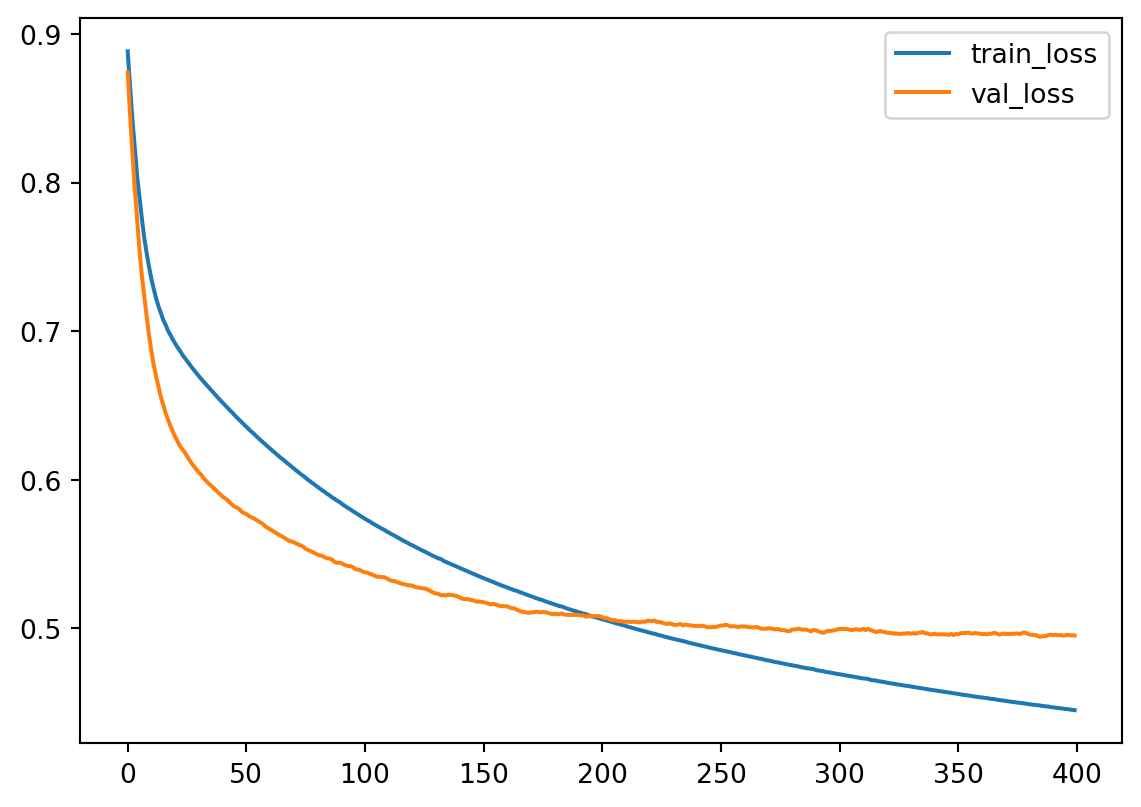

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

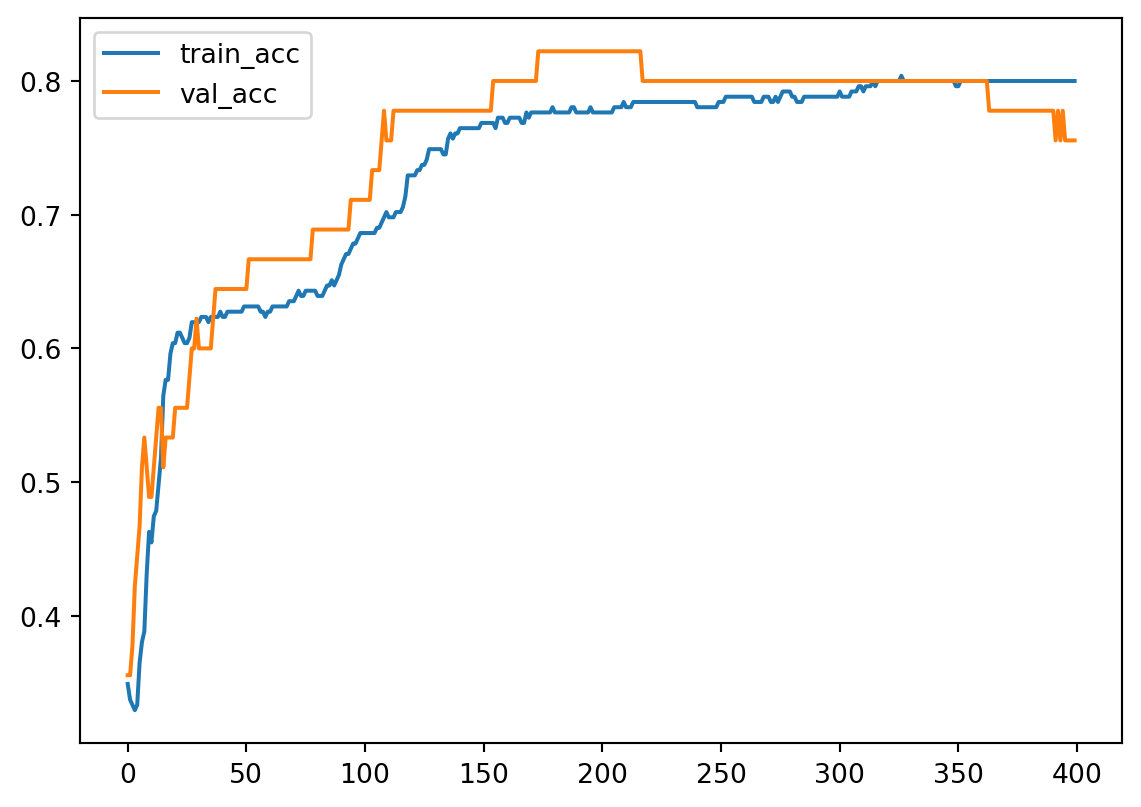

In [15]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [16]:
#| output: false
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))

Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.5276 - accuracy: 0.4333

9/9 [==============================] - 0s 18ms/step - loss: 1.4164 - accuracy: 0.5333 - val_loss: 1.3543 - val_accuracy: 0.5333


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 1.3202 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 1.2877 - accuracy: 0.5608 - val_loss: 1.2352 - val_accuracy: 0.5556


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 1.2123 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 1.1805 - accuracy: 0.5725 - val_loss: 1.1369 - val_accuracy: 0.5556


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 1.1117 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 1.0923 - accuracy: 0.5725 - val_loss: 1.0550 - val_accuracy: 0.6222


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0971 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 1.0190 - accuracy: 0.5961 - val_loss: 0.9867 - val_accuracy: 0.6222


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9921 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.9579 - accuracy: 0.5922 - val_loss: 0.9304 - val_accuracy: 0.6222


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9329 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.9073 - accuracy: 0.6000 - val_loss: 0.8831 - val_accuracy: 0.6222


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8242 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.8653 - accuracy: 0.6118 - val_loss: 0.8437 - val_accuracy: 0.6222


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8288 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.8304 - accuracy: 0.6157 - val_loss: 0.8108 - val_accuracy: 0.6667


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8038 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.8015 - accuracy: 0.6157 - val_loss: 0.7833 - val_accuracy: 0.6667


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8329 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.7771 - accuracy: 0.6196 - val_loss: 0.7599 - val_accuracy: 0.6667


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8312 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.7571 - accuracy: 0.6196 - val_loss: 0.7409 - val_accuracy: 0.6889


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.7404 - accuracy: 0.6235 - val_loss: 0.7252 - val_accuracy: 0.6889


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7647 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.7264 - accuracy: 0.6235 - val_loss: 0.7118 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7280 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.7148 - accuracy: 0.6235 - val_loss: 0.7005 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7238 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.7052 - accuracy: 0.6235 - val_loss: 0.6910 - val_accuracy: 0.6889


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6843 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6970 - accuracy: 0.6275 - val_loss: 0.6829 - val_accuracy: 0.6889


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7001 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.6275 - val_loss: 0.6764 - val_accuracy: 0.6889


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6907 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.6275 - val_loss: 0.6707 - val_accuracy: 0.6889


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.6275 - val_loss: 0.6660 - val_accuracy: 0.6889


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6583 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.6275 - val_loss: 0.6618 - val_accuracy: 0.6889


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.6275 - val_loss: 0.6584 - val_accuracy: 0.6889


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6275 - val_loss: 0.6557 - val_accuracy: 0.6889


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6853 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.6275 - val_loss: 0.6534 - val_accuracy: 0.6889


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6395 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6275 - val_loss: 0.6517 - val_accuracy: 0.6889


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6060 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.6275 - val_loss: 0.6499 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6565 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6275 - val_loss: 0.6482 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6621 - accuracy: 0.6275 - val_loss: 0.6470 - val_accuracy: 0.6889


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7192 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.6275 - val_loss: 0.6452 - val_accuracy: 0.6889


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6603 - accuracy: 0.6275 - val_loss: 0.6446 - val_accuracy: 0.6889


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6595 - accuracy: 0.6275 - val_loss: 0.6435 - val_accuracy: 0.6889


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6457 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6590 - accuracy: 0.6275 - val_loss: 0.6426 - val_accuracy: 0.6889


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6694 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6583 - accuracy: 0.6275 - val_loss: 0.6417 - val_accuracy: 0.6889


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6734 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6275 - val_loss: 0.6408 - val_accuracy: 0.6889


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.6275 - val_loss: 0.6402 - val_accuracy: 0.6889


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6572 - accuracy: 0.6275 - val_loss: 0.6397 - val_accuracy: 0.6889


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6144 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.6275 - val_loss: 0.6392 - val_accuracy: 0.6889


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6529 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.6275 - val_loss: 0.6388 - val_accuracy: 0.6889


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6275 - val_loss: 0.6388 - val_accuracy: 0.6889


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6821 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.6275 - val_loss: 0.6382 - val_accuracy: 0.6889


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6510 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6559 - accuracy: 0.6275 - val_loss: 0.6379 - val_accuracy: 0.6889


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6798 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6275 - val_loss: 0.6374 - val_accuracy: 0.6889


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7043 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6275 - val_loss: 0.6370 - val_accuracy: 0.6889


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6275 - val_loss: 0.6367 - val_accuracy: 0.6889


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6275 - val_loss: 0.6363 - val_accuracy: 0.6889


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7034 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6275 - val_loss: 0.6360 - val_accuracy: 0.6889


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6275 - val_loss: 0.6360 - val_accuracy: 0.6889


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6275 - val_loss: 0.6359 - val_accuracy: 0.6889


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6244 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6275 - val_loss: 0.6359 - val_accuracy: 0.6889


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6852 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6275 - val_loss: 0.6358 - val_accuracy: 0.6889


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6275 - val_loss: 0.6359 - val_accuracy: 0.6889


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7086 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6275 - val_loss: 0.6355 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6275 - val_loss: 0.6349 - val_accuracy: 0.6889


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6275 - val_loss: 0.6349 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5794 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6275 - val_loss: 0.6350 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6689 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6275 - val_loss: 0.6352 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6636 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6541 - accuracy: 0.6275 - val_loss: 0.6351 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6671 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6275 - val_loss: 0.6347 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6344 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6344 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6530 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.6275 - val_loss: 0.6342 - val_accuracy: 0.6889


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6788 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.6275 - val_loss: 0.6340 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6934 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.6275 - val_loss: 0.6337 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6535 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6275 - val_loss: 0.6332 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.6331 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6329 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6790 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6326 - val_accuracy: 0.6889


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6171 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.6275 - val_loss: 0.6324 - val_accuracy: 0.6889


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7071 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6324 - val_accuracy: 0.6889


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6796 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7003 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6316 - val_accuracy: 0.6889


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7052 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6310 - val_accuracy: 0.6889


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6310 - val_accuracy: 0.6889


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5761 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6309 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6499 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7199 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6432 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6700 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6303 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6318 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6301 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6066 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6300 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6299 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6418 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7000

9/9 [==============================] - 0s 11ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7219 - accuracy: 0.5000

9/9 [==============================] - 0s 10ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6608 - accuracy: 0.6333

9/9 [==============================] - 0s 9ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7235 - accuracy: 0.4333

9/9 [==============================] - 0s 10ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5968 - accuracy: 0.7667

9/9 [==============================] - 0s 11ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6149 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6935 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6472 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7085 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7409 - accuracy: 0.4333

9/9 [==============================] - 0s 7ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6757 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6284 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6768 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6284 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7172 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6556 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5983 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6593 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6497 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5919 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6284 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6322 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5928 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6115 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6634 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7106 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6829 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6502 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7074 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6936 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6894 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6305 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7183 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7059 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6568 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6641 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6424 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7550 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6954 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6652 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6366 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5686 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6867 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5367 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6238 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7272 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5643 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6139 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6611 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6035 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5780 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6718 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6046 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5918 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6781 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6313 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7064 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7039 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7341 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7065 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6117 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7015 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6000

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6667

9/9 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6412 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7003 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6707 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7025 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7102 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6160 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6568 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6112 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7296 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6077 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6094 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6635 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6941 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6220 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6881 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6232 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6575 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6707 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6305 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6304 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7071 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6400 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6397 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6085 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6642 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6798 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7059 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6421 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6522 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6174 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6185 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7117 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5451 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5751 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6454 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6800 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6496 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6421 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7383 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6405 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6933 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6359 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6287 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6546 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6937 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6008 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6240 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6278 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5482 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6722 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6622 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7414 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7177 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5936 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6220 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6434 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5946 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5941 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6855 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6354 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7001 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6412 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6772 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7162 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6202 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6963 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6089 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6631 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6156 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6856 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6244 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6790 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6160 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7145 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5862 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6636 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7358 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5669 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7098 - accuracy: 0.5000

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6635 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6690 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6400 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7486 - accuracy: 0.4333

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6558 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6395 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6698 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6464 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6031 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5586 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5784 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6768 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6496 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6973 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6646 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7143 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6028 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6732 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5599 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5908 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6283 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7401 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5808 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7013 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6411 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5707 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6419 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6951 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5464 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6418 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6763 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6788 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7305 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6694 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


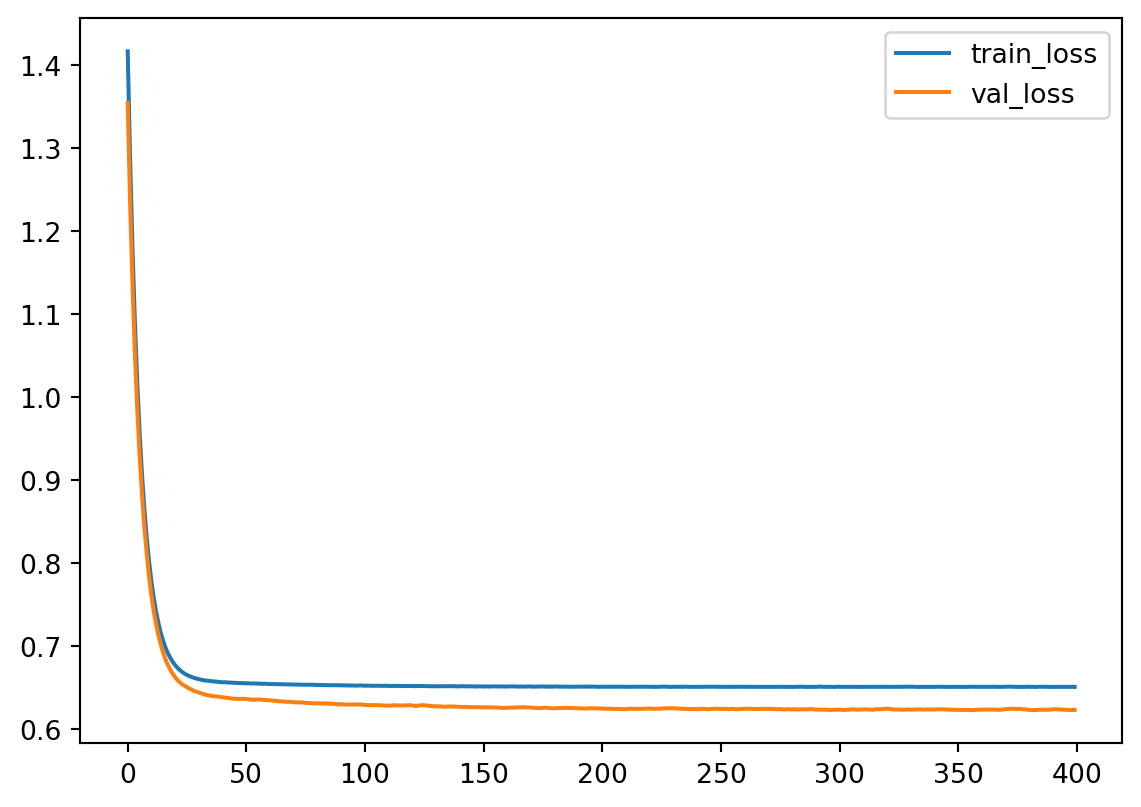

In [17]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

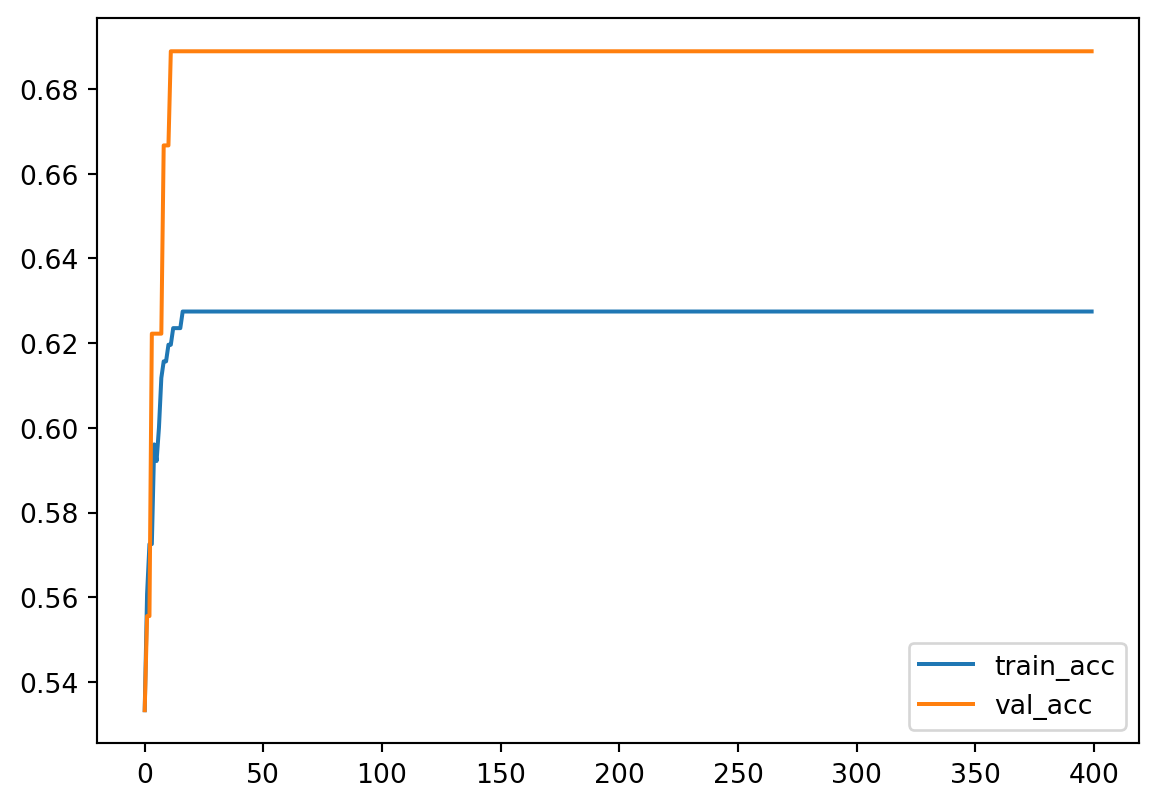

In [18]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

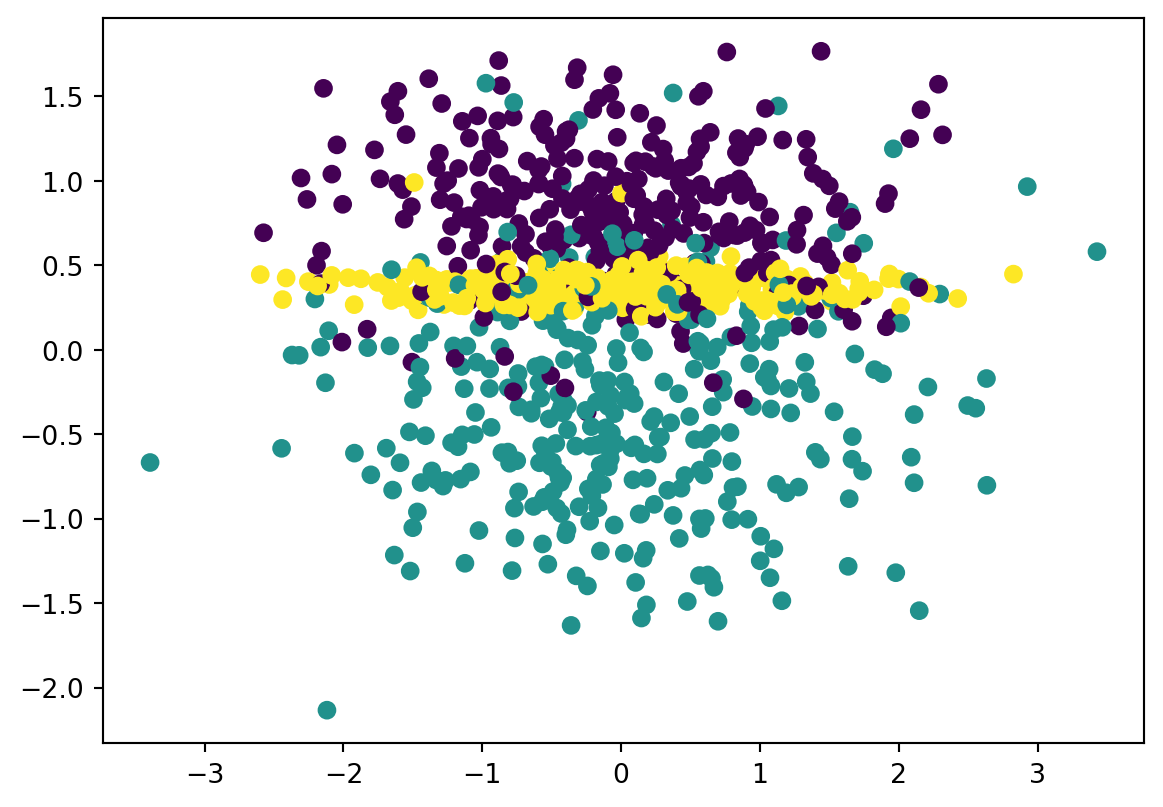

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8466666666666667

In [22]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8266666666666667

In [23]:
import keras_core as keras
from keras.utils import to_categorical
vy_train = to_categorical(y_train, num_classes=3)
vy_test = to_categorical(y_test, num_classes=3)

In [24]:
#| output: false
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3, activation='softmax', input_dim=10))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, vy_train, epochs=50, batch_size=50, verbose=0)
_ = model.evaluate(X_test, vy_test)

1/5 [=====>........................] - ETA: 0s - loss: 0.5774 - accuracy: 0.8125

5/5 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7733
